In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 전역 임계처리 (Global Thresholding)
    하나의 이미지에 전역으로 적용될 하나의 문턱값을 이용해 thresholding 기능을 제공하는 함수가 있다.
    
## cv2.threshold(src, thresh, maxval, type [, dst]) → retval, dst
    threshold 함수는 멀티 채널 배열의 thresholding을 픽셀단위로 적용한다. 즉 컬러 이미지에도 사용할 수 있으나, ★주로 Grayscale 이미지에서 바이너리 이미지를 얻기 위해 사용하거나 픽셀 값 중 너무 크거나 작은 값들을 필터링하여 노이즈를 제거하기 위해 사용한다.

    1. src : threshold에 적용할 이미지, 다중 채널 이미지도 가능하나 보통은 Grayscale 이미지를 적용한다.
    2. thresh : 임계값
    3. maxval : thresh를 넘었을 때 적용되는 최대값 (혹은 thresh보다 작을 때 적용되는 최댓값)
    
    ★★ type : 임계값 적용 방법 및 스타일
    1. THRESH_BINARY : 픽셀값이 thresh 값보다 크면 maxval 적용, 아니면 0
    2. THRESH_BINARY_INV : 픽셀값이 thresh 값보다 크면 0 적용, 아니면 maxval
    3. THRESH_TRUNC : 픽셀값이 thresh 값보다 크면 thresh 적용, 아니면 픽셀값 그대로
    4. THRESH_TOZERO : 픽셀값이 thresh 값보다 크면 픽셀값 적용, 아니면 0
    5, THRESH_TOZERO_INV : 픽셀값이 thresh 값보다 크면 0 적용, 아니면 픽셀값 그대로
    cv::ThresholdTypes 참고
    
    ThresholdTypes를 보다보면 THRESH_OTSU, THRESH_TRIANGLE flag도 제공하는데 이는 위의 flags 중 하나와 결합하여 같이 사용한다. 이 경우 함수는 특정 임계값을 사용하는 것 대신에 Otsu나 Triangle 알고리즘을 사용하여 "최적 임계값"을 결정한다. 참고로 이와 같은 알고리즘을 사용할 때에는 8bit, 싱글채널 이미지에서만 가능하다.

In [2]:
img = cv2.imread('KakaoTalk_20200723_152859064.jpg', cv2.IMREAD_GRAYSCALE)
img.shape

(960, 960)

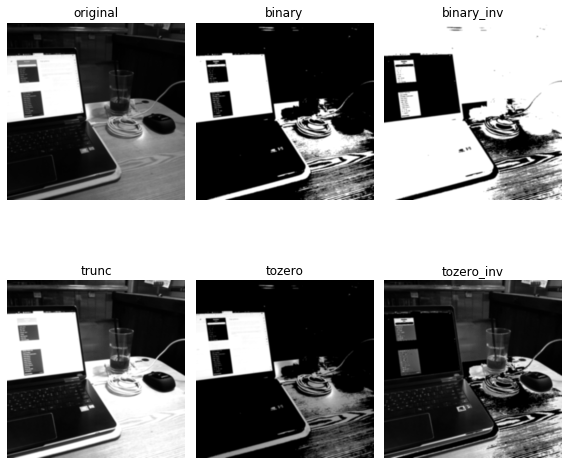

In [3]:
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['original', 'binary', 'binary_inv', 'trunc', 'tozero', 'tozero_inv']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(8, 8))
for i in range(0, 6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray', interpolation='bicubic')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

## OTSU's binarization
    앞서 threshold 함수를 사용할 때 우리는 임의로 임계값을 정하여 사용하였다. 하지만 어떤 이미지에 어떤 임계값을 적용해야 가장 좋은 결과를 나타날지에 대해서는 여러번의 시행착오를 거쳐서 알아내야 한다. 
    
    이런 시행착오를 방지하기 위해 나타난 방법이 바로 OTSU와 Triangle 알고리즘이다. 그 중 OTSU 알고리즘은 이미지의 히스토그램을 이용해서 두 개의 클래스로 가장 잘 분할할 수 있는 임계값이 얼마인지를 찾는 알고리즘이다. 기본적인 알고리즘은 어떤 임계값 T를 기준으로 이미지의 픽셀들을 두 클래스로 분류했을 때, 두 클래스 간의 급간분산(between-class variance interclass variance)를 최대화 하는 과정이다. 급간분산의 값이 커질수록 두 클래스 간의 분리도가 커지므로 이 값을 최대화하는 T값을 찾는 것이 OTSU 알고리즘의 목적이라고 할 수 있다.
    
    OTSU binarization을 따로 적용하는 함수는 없지만 threshold() 함수에서 임계값을 처리하는 방식에 cv2.THRESH_OTSU 플래그를 전달하면 된다. 이때, threshold 함수의 thresh 파라미터에는 0을 인자로 전달해주면 된다. 이렇게 하면 OTSU에서 0~255사이의 최적 임계값(Optimal Threshold)를 계산한 뒤 적용한 결과를 반환한다.

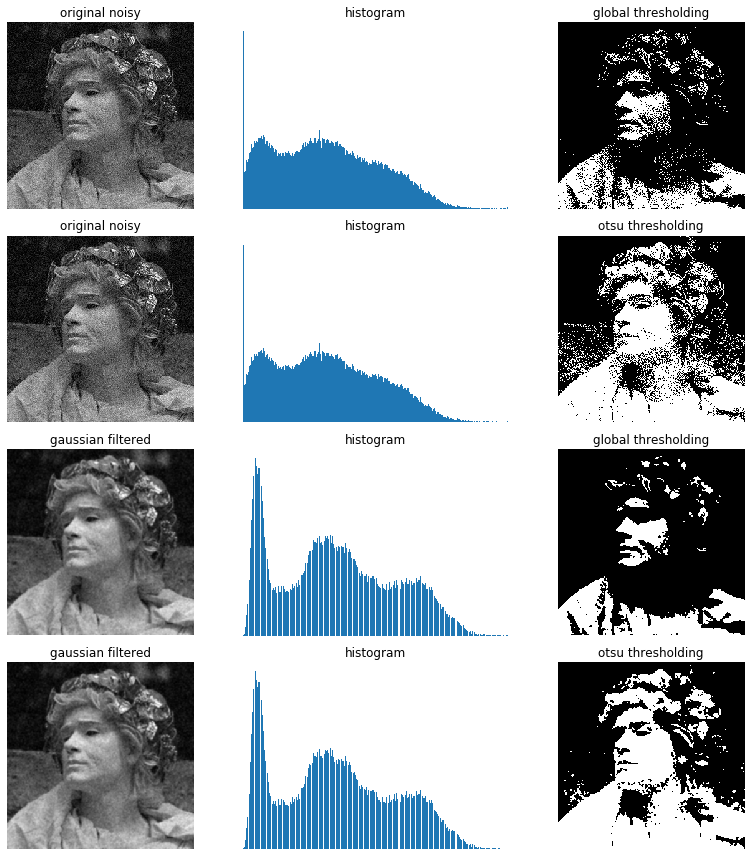

In [4]:
img = cv2.imread('300px-Kodim17_noisy.jpg',  cv2.IMREAD_GRAYSCALE)

# global thresholding
ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# otsu binarization
ret, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# gaussian blur and global thresholding
blur = cv2.GaussianBlur(img, (5, 5), 0)
ret, th3 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)

# gaussian blur and otsu binarization
ret, th4 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


titles = ['original noisy', 'histogram', 'global thresholding',
          'original noisy', 'histogram', 'otsu thresholding',
          'gaussian filtered', 'histogram', 'global thresholding',
          'gaussian filtered', 'histogram', 'otsu thresholding']
images = [img, 0, th1, img, 0, th2, blur, 0, th3, blur, 0, th4]

plt.figure(figsize=(12, 12))
for i in range(4):
    plt.subplot(4, 3, i*3+1)
    plt.imshow(images[i*3], cmap='gray')
    plt.title(titles[i*3])
    plt.axis('off')

    plt.subplot(4, 3, i*3+2)
    plt.hist(images[i*3].ravel(), 256)
    plt.title(titles[i*3+1])
    plt.axis('off')

    plt.subplot(4, 3, i*3+3)
    plt.imshow(images[i*3+2], cmap='gray')
    plt.title(titles[i*3+2])
    plt.axis('off')

plt.tight_layout()
plt.show()

    이미지 이진화를 어떻게 하는지를 알아보기 위해 노이즈가 심한 이미지를 불러왔다. 위의 결과를 봤을 때, Gaussian blur를 적용하면 확실하게 이미지 히스토그램에서 봉우리를 만들고, 이미지 또한 전보다 선명해진 것을 확인할 수 있다. 이 이미지에 OTSU 알고리즘을 적용하여 문턱값을 구한 후 임계처리를 적용하면 노이즈를 보다 확실히 제거할 수 있다.

# 지역 임계처리 (Adaptive Thresholding)
    이전에서 다루었던 cv2.threshold 함수를 이용한 임계처리는 임계값을 이미지 전체에 적용하여 처리하기 때문에 하나의 이미지에 음영이 다르면 일부 영역이 모두 흰색 또는 검정색으로 보여지게 된다. 즉, 전역 임계처리 방법은 광원 조건에 따라 이미지 임계처리를 하는데 있어 그리 효과적인 방법이 아닐 수도 있다. 이를 해결하기 위해 전체 이미지가 아닌 이미지의 작은 영역에 적용되는 문턱값을 계산하고 이를 이미지에 적용함으로써 보다 나은 결과를 도출하는 방법이 사용된다.
    
## cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C [, dst]) → dst
    
    1. src : GrayScale 이미지(8bit, 싱글채널 이미지)만 가능하다.
    2. maxValue : 픽셀값이 adaptiveMethod로 계산한 임계값을 넘었을 때 적용되는 최대값 (혹은 작을 때 적용되는 최댓값)
    
    ★★ adaptiveMethod : thresholding value를 결정하는데 사용되는 계산 방법 (알고리즘)
    1. ADAPTIVE_THRESH_MEAN_C : 픽셀 (x, y)를 중심으로 blockSize * blockSize 안에 있는 픽셀값의 평균에서 C를 뺀 값을 임계값으로 설정
    2. ADAPTIVE_THRESH_GAUSSIAN_C : 픽셀 (x, y)를 중심으로 blockSize * blockSize 안에서 가우시안 윈도우와의 교차상관을 통해 만들어진 가중치 합에서 C를 뺀 값을 임계값으로 설정
    cv::AdaptiveThresholdTypes 참고
    
    ★★ thresholdType : 임계값 적용 방법
    앞서 threshold 함수에서 살펴봤던 다양한 임계값 적용 방법과는 다르게 오직 두가지 방법만 사용할 수 있다.
    1. THRESH_BINARY : 픽셀값이 adaptiveMethod로 계산한 임계값보다 크면 maxValue, 작으면 0 
    2. THRESH_BINARY_INV : 픽셀값이 adaptiveMethod로 계산한 값보다 크면 0, 작으면 maxValue
    
    5. blockSize : 특정 픽셀과 인접하여 임계값을 계산하기 위한 블록의 크기, 반드시 홀수여야 한다.
    6. C : 보정상수(bias 값), 양수면 adaptiveMethod에서 계산한 임계값에서 보정상수를 빼고, 음수면 더한다.

In [5]:
img2 = cv2.imread('KakaoTalk_20200723_152859064.jpg', cv2.IMREAD_GRAYSCALE)
img2.shape

(960, 960)

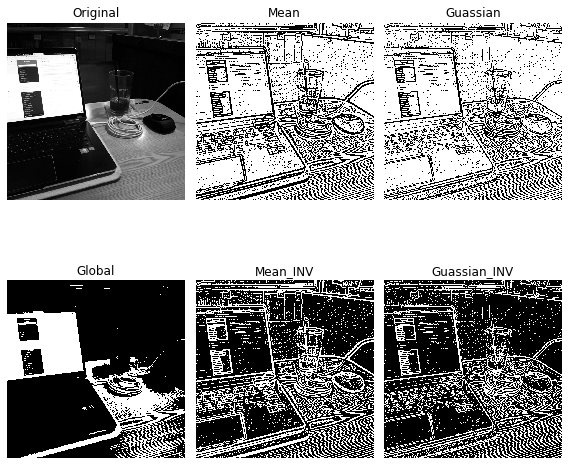

In [7]:
ret, th1 = cv2.threshold(img2, 127, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 2)
th3 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 2)
th4 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 2)
th5 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 2)

titles = ['Original', 'Mean', 'Guassian', 'Global', 'Mean_INV', 'Guassian_INV']
images = [img2, th2, th3, th1, th4, th5]

plt.figure(figsize=(8, 8))
for i in range(0, 6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()